In [13]:
# Externals
import pickle
import numpy as np
from PIL import *
import cv2
import glob
import matplotlib.pyplot as plt

In [14]:
# Change Path
local_path = '../../Data/train/train_data_batch_1'

# Load Imagenet
def load_imagenet_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f)
    data = batch['data']
    labels = batch['labels']
    return data, labels

# Load Data, Print Shapes
data, labels = load_imagenet_batch(local_path)
print(len(data), len(labels), len(data[0]))

128116 128116 12288


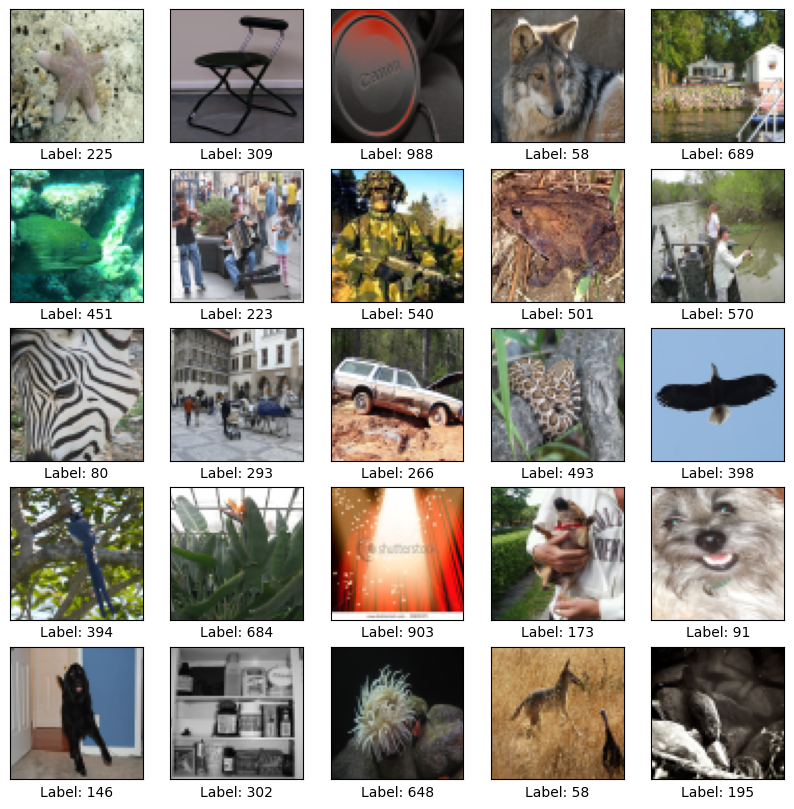

In [15]:
# Reshape, Visualize Images
def visualize_images(images, labels, num_images = 25):
    plt.figure(figsize = (10, 10))
    for i in range(num_images):
        idx = np.random.randint(0, len(images))
        img_flat = images[idx]
        
        # Split Flat Array Into Three Parts (3 Color Channels)
        red_channel = img_flat[0:4096].reshape(64, 64)
        green_channel = img_flat[4096:4096*2].reshape(64, 64)
        blue_channel = img_flat[4096*2:4096*3].reshape(64, 64)
        
        # Stack Channels To Get RGB Image
        img_rgb = np.stack((red_channel, green_channel, blue_channel), axis = -1)
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img_rgb)
        plt.xlabel(f'Label: {labels[idx]}')
    plt.show()

# Visualize Everything
visualize_images(data, labels)

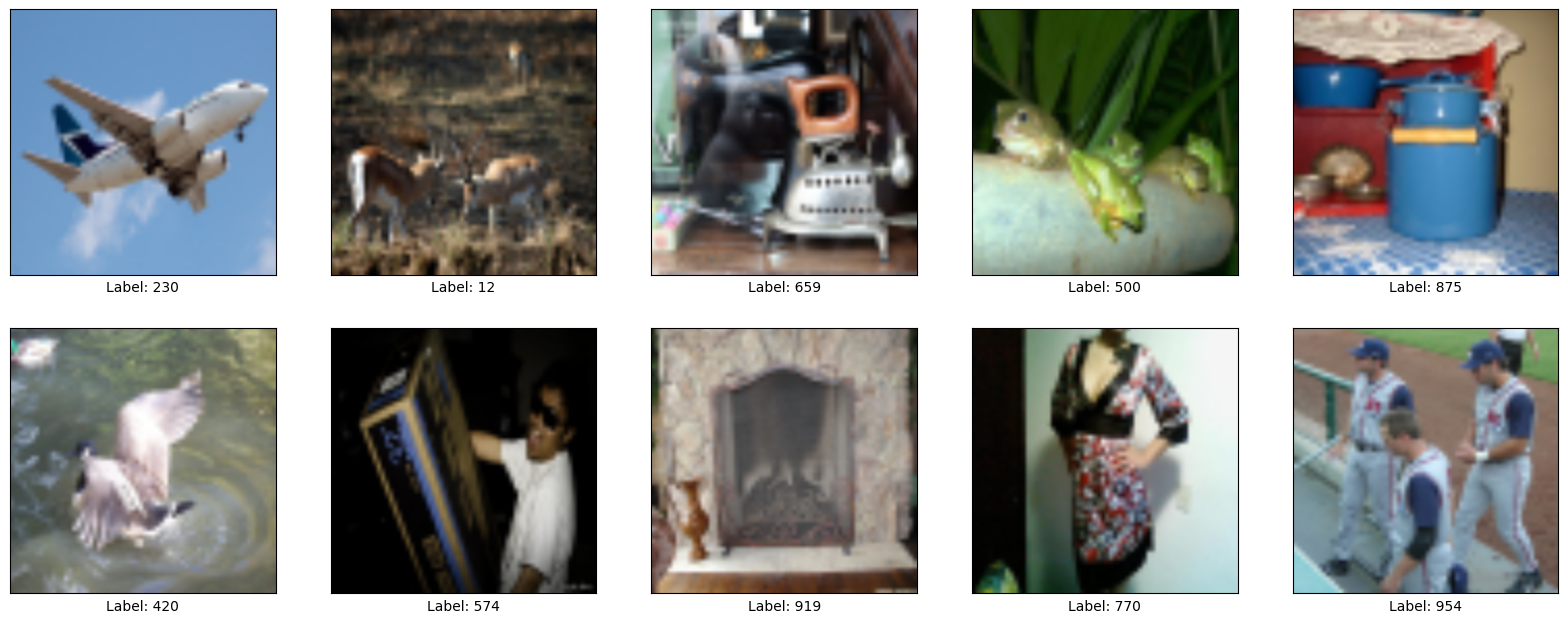

In [16]:
def visualize_and_upscale_images(images, labels, upscale_factor = 4, num_images = 10):
    plt.figure(figsize = (20, 20))
    
    for i in range(num_images):
        idx = np.random.randint(0, len(images))
        img_flat = images[idx]
        
        # Split Flat Array Into Three Parts (3 Color Channels)
        red_channel = img_flat[0:4096].reshape(64, 64)
        green_channel = img_flat[4096:4096*2].reshape(64, 64)
        blue_channel = img_flat[4096*2:4096*3].reshape(64, 64)
        
        # Stacking Channels
        img_rgb = np.stack((red_channel, green_channel, blue_channel), axis = -1)
        
        # Upscaling Image, Show
        upscaled_img = cv2.resize(img_rgb, (0, 0), fx = upscale_factor, fy = upscale_factor, interpolation = cv2.INTER_LINEAR)
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(upscaled_img)
        plt.xlabel(f'Label: {labels[idx]}')
    plt.show()

# Visualize, Upscale Images
visualize_and_upscale_images(data, labels)